# Don't get kicked

Predict if a car purchased at auction is a lemon

Kaggle competition source: https://www.kaggle.com/c/DontGetKicked

Logistic regression examples: https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
with open('data/Carvana_Data_Dictionary.txt') as fp:
    print(fp.read())

Field Name				Definition
RefID				        Unique (sequential) number assigned to vehicles
IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
PurchDate				The Date the vehicle was Purchased at Auction
Auction					Auction provider at which the  vehicle was purchased
VehYear					The manufacturer's year of the vehicle
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers
MMRAcquisitionAuctionAveragePrice	Acquisiti

In [6]:
df = pd.read_csv('data/training.csv',
                parse_dates=['PurchDate'])

In [7]:
pd.set_option('display.max_colwidth', -1)

In [8]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [9]:
import seaborn as sns


In [10]:
# How many 'bad buys' are in the data?
ratio_badbuy = df['IsBadBuy'].sum() / df['IsBadBuy'].count()

print("{:.2f} percent of cars in the dataset are considered (=labeled) bad buys.".format(ratio_badbuy*100))

12.30 percent of cars in the dataset are considered (=labeled) bad buys.


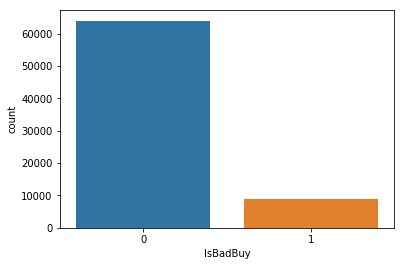

In [11]:
sns.countplot(x='IsBadBuy',data=df)

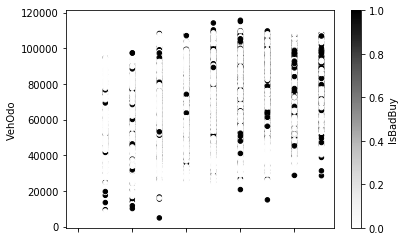

In [36]:
df.plot.scatter(x='VehicleAge', y='VehOdo', c='IsBadBuy')

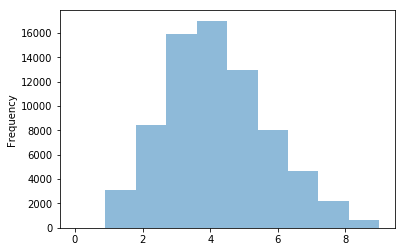

In [41]:
df['VehicleAge'].plot.hist(bins=10, alpha=0.5)

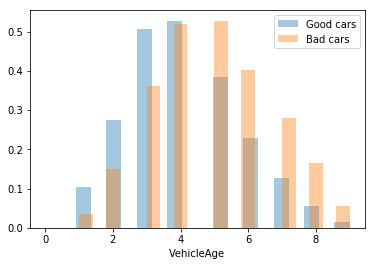

In [53]:
# https://seaborn.pydata.org/generated/seaborn.distplot.html
bins = len(df['VehicleAge'].unique())
sns.distplot(df[df['IsBadBuy']==0]['VehicleAge'], kde=False, label='Good cars', norm_hist=True, bins=bins*2)
sns.distplot(df[df['IsBadBuy']==1]['VehicleAge'], kde=False, label='Bad cars', norm_hist=True, bins=bins*2)
plt.legend()

In [15]:
df['VehicleAge'].mean(), df['VehicleAge'].median()

(4.176643875971116, 4.0)

In [71]:
old_cars = df[df['VehicleAge'] > 5]['IsBadBuy']
new_cars = df[df['VehicleAge'] <= 5]['IsBadBuy']
old_mean, old_std = old_cars.mean(), old_cars.std()
new_mean, new_std = new_cars.mean(), new_cars.std()
print("Old cars, isBadBuy: {:.2f} +- {:.2f}".format(old_mean, old_std))
print("New cars, isBadBuy: {:.2f} +- {:.2f}".format(new_mean, new_std))

Old cars, isBadBuy: 0.21 +- 0.41
New cars, isBadBuy: 0.10 +- 0.30


## t-statistics (by hand)

Calculate t-statistic as:

![](https://miro.medium.com/max/932/1*1ZUnA4eR5J2WEGhDVPDkEw.png)

Source: https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

In [29]:
n_old = old_cars.count()
n_new = new_cars.count()

s_squared_old = sum((old_cars - old_mean)**2)/(n_old-1)
s_squared_new = sum((new_cars - new_mean)**2)/(n_new-1)

t = (old_mean - new_mean) / (( s_squared_old/old_cars.count() + s_squared_new/new_cars.count() )**0.5)
t

31.366866166871798

Now you would have to look up that value of t in a table, to yield what the resulting p-value for significance is. Alternatively, we can do this in scipy:

## t-statistics (using scipy)

In [69]:
# source: http://www.insightsbot.com/python-t-test-a-friendly-guide/
from scipy import stats
t_stat, p_value = stats.ttest_ind(old_cars, new_cars, equal_var = False)
print("P-Value: {0} T-Statistic: {1}".format(p_value,t_stat))

P-Value: 6.07651057395558e-211 T-Statistic: 31.366866166869244


In [70]:
p_value < .05

True

In [29]:
df.corr()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,0.023973,0.010580,-0.025404,0.013110,-0.026553,-0.011568,-0.015704,-0.032208,-0.034324,-0.008742,-0.013015,-0.021616,-0.024369,0.032896,0.131898,-0.011873,-0.048851,-0.023478
IsBadBuy,0.023973,1.000000,-0.158886,0.167164,-0.044620,0.082560,-0.109252,-0.102954,-0.087418,-0.083665,-0.109112,-0.104020,-0.103914,-0.100245,-0.061488,0.005796,-0.099911,-0.003697,0.052319
VehYear,0.010580,-0.158886,1.000000,-0.957957,0.259660,-0.283719,0.581146,0.532927,0.581191,0.539230,0.590820,0.548426,0.598490,0.558669,0.280791,0.068276,0.349965,0.057380,-0.268696
VehicleAge,-0.025404,0.167164,-0.957957,1.000000,-0.250801,0.319794,-0.565690,-0.518810,-0.460854,-0.426382,-0.575607,-0.532505,-0.504062,-0.469359,-0.268269,-0.074857,-0.312329,-0.024771,0.259310
WheelTypeID,0.013110,-0.044620,0.259660,-0.250801,1.000000,-0.213558,-0.095471,-0.129597,-0.072700,-0.102019,-0.088597,-0.121211,-0.074420,-0.102488,0.187199,0.007901,-0.162826,-0.006747,-0.132798
VehOdo,-0.026553,0.082560,-0.283719,0.319794,-0.213558,1.000000,-0.017022,0.024617,0.031306,0.063165,-0.028568,0.012107,0.015811,0.048005,-0.288456,-0.053041,-0.062008,0.029556,0.411718
MMRAcquisitionAuctionAveragePrice,-0.011568,-0.109252,0.581146,-0.565690,-0.095471,-0.017022,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042,0.107734,0.045694,0.789840,0.038818,-0.050417
MMRAcquisitionAuctionCleanPrice,-0.015704,-0.102954,0.532927,-0.518810,-0.129597,0.024617,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716,0.871203,0.062502,0.040675,0.781516,0.038667,-0.020644
MMRAcquisitionRetailAveragePrice,-0.032208,-0.087418,0.581191,-0.460854,-0.072700,0.031306,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108,0.906054,0.107516,0.035489,0.746126,0.080627,-0.053444
MMRAcquisitonRetailCleanPrice,-0.034324,-0.083665,0.539230,-0.426382,-0.102019,0.063165,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188,0.906810,0.069676,0.031284,0.744966,0.077670,-0.026933


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fa2c7f0>]],
      dtype=object)

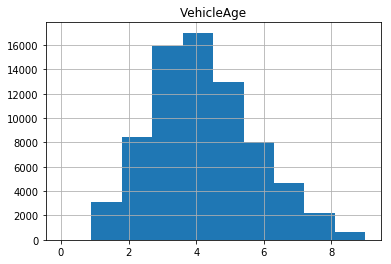

In [11]:
df.hist(column='VehicleAge')

In [34]:
for col in df.columns:
    print(col)

RefId
IsBadBuy
PurchDate
Auction
VehYear
VehicleAge
Make
Model
Trim
SubModel
Color
Transmission
WheelTypeID
WheelType
VehOdo
Nationality
Size
TopThreeAmericanName
MMRAcquisitionAuctionAveragePrice
MMRAcquisitionAuctionCleanPrice
MMRAcquisitionRetailAveragePrice
MMRAcquisitonRetailCleanPrice
MMRCurrentAuctionAveragePrice
MMRCurrentAuctionCleanPrice
MMRCurrentRetailAveragePrice
MMRCurrentRetailCleanPrice
PRIMEUNIT
AUCGUART
BYRNO
VNZIP1
VNST
VehBCost
IsOnlineSale
WarrantyCost


In [12]:
from sklearn.linear_model import LinearRegression

In [44]:
categorical = ['Make', 'Auction', 'Size', 'PRIMEUNIT', 'AUCGUART', 'VNST']

In [47]:
X = pd.get_dummies(data=categorical)


In [48]:
X

,AUCGUART,Auction,Make,PRIMEUNIT,Size,VNST
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
5,0,0,0,0,0,1


In [15]:
# TODO: impute 'YELLOW' for missing values, and then also use this variable
df['AUCGUART'].unique()

array([nan, 'GREEN', 'RED'], dtype=object)

In [16]:
# same
df['PRIMEUNIT'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [18]:
df['VNST'].unique()

array(['FL', 'VA', 'IA', 'AR', 'MN', 'TN', 'PA', 'OH', 'AL', 'MI', 'TX',
       'IL', 'MA', 'AZ', 'GA', 'NC', 'MD', 'CA', 'UT', 'OR', 'SC', 'CO',
       'ID', 'NV', 'WV', 'MS', 'OK', 'NM', 'LA', 'IN', 'MO', 'WA', 'NH',
       'NJ', 'NY', 'NE', 'KY'], dtype=object)

In [19]:
make = pd.get_dummies(df['Make'], drop_first=True)
size = pd.get_dummies(df['Size'], drop_first=True)
state = pd.get_dummies(df['VNST'], drop_first=True)

In [22]:
# First: grab all numerical variables we're interested in
# Right now this is a guess. Proper statistical analysis would yield 
# which ones are more helpful to take than these
_train = df[['VehicleAge', 'VehBCost', 'MMRAcquisitionAuctionAveragePrice', 'IsOnlineSale']]

# append numerical and categorical variables (categorical are encoded using dummy columns)
train = pd.concat([_train, make, size, state],axis=1)


In [30]:
train.isnull().count()

VehicleAge                           72983
VehBCost                             72983
MMRAcquisitionAuctionAveragePrice    72983
IsOnlineSale                         72983
BUICK                                72983
                                     ...  
TX                                   72983
UT                                   72983
VA                                   72983
WA                                   72983
WV                                   72983
Length: 83, dtype: int64

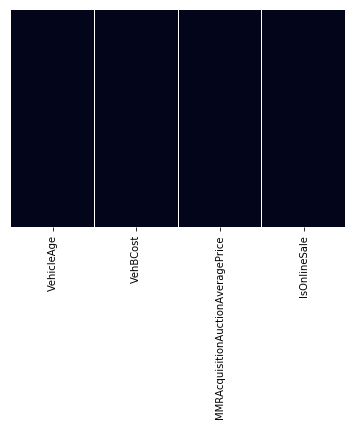

In [26]:
sns.heatmap(_train.isnull(), yticklabels=False, cbar=False)


In [31]:
# FIXME: replace train.fillna(0) with proper imputation!

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train.fillna(0), 
                                                  df['IsBadBuy'], test_size=0.30, 
                                                  random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_val)

/Users/flo/miniconda3/envs/learn-ml/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     19211
           1       0.00      0.00      0.00      2684

   micro avg       0.88      0.88      0.88     21895
   macro avg       0.44      0.50      0.47     21895
weighted avg       0.77      0.88      0.82     21895



/Users/flo/miniconda3/envs/learn-ml/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
logmodel.coef_

array([[ 6.57847045e-04, -2.30149188e-04, -7.71432626e-05,
         3.90314592e-07,  2.66277219e-06,  1.28687054e-06,
        -1.97094521e-04, -2.26307866e-05, -9.90566424e-05,
         6.77402121e-05,  9.18827932e-06,  6.54673929e-06,
         0.00000000e+00, -2.27192236e-05,  4.55556515e-06,
        -2.40362104e-06,  4.71969825e-05, -4.51636733e-05,
         4.38862527e-06,  5.63913058e-06,  2.26315883e-05,
         1.06731982e-05,  2.28006662e-06, -5.52749528e-06,
         5.27945075e-05, -1.42729782e-06, -1.73913801e-07,
        -1.18168061e-05, -2.57278643e-05,  5.11455853e-07,
         1.59422675e-06, -1.76864820e-05,  1.00539098e-05,
         0.00000000e+00,  2.90285672e-06, -8.64178880e-07,
         1.69038896e-05, -7.07586147e-05,  6.80938447e-05,
         5.29586109e-05, -3.69499810e-04,  1.79345017e-04,
         3.20601121e-05, -5.59096625e-06,  2.78599446e-05,
         2.71918099e-05, -6.56786077e-05,  3.10698613e-06,
        -4.53089694e-05,  7.01549407e-06, -3.76925214e-0

In [39]:
import numpy as np

In [44]:
logmodel.coef_.shape

(1, 83)

In [47]:
important_var_idx = np.argmax(logmodel.coef_, axis=1)
important_var_idx

array([0])

In [43]:
train.columns[important_var_idx]

'VehicleAge'